In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importar el Data Set
dataSet = pd.read_csv("Position_Salaries.csv")

In [4]:
dataSet.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
X = dataSet.iloc[:, 1:2].values
y = dataSet.iloc[:, 2].values

In [12]:
print("type(X): ", type(X), ", Filas y Columnas X: ", X.shape, ", Filas de X: ", X.shape[0])
print("type(y): ", type(y), ", Filas y Columnas y: ", y.shape, ", Filas de y: ", y.shape[0])

type(X):  <class 'numpy.ndarray'> , Filas y Columnas X:  (10, 1) , Filas de X:  10
type(y):  <class 'numpy.ndarray'> , Filas y Columnas y:  (10,) , Filas de y:  10


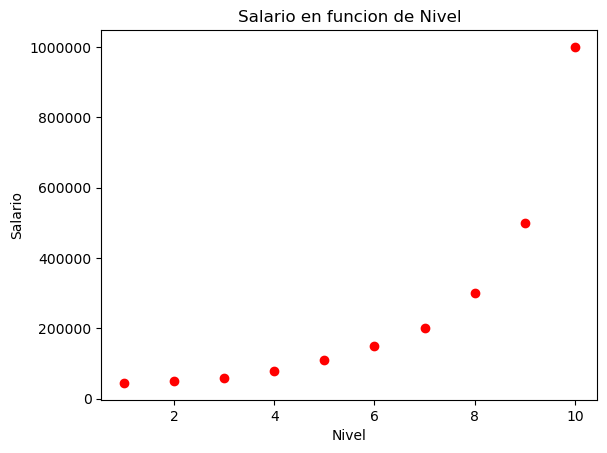

In [13]:
#Visualizar Conjunto de Datos Originales
from matplotlib.ticker import FuncFormatter, ScalarFormatter
plt.scatter(X, y, color = "red")
plt.title("Salario en funcion de Nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")

fmt = ScalarFormatter()
fmt.set_scientific(False)
plt.gca().yaxis.set_major_formatter(fmt)


plt.show()

In [14]:
#Ajustar el modelo Random Forest al Data Set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

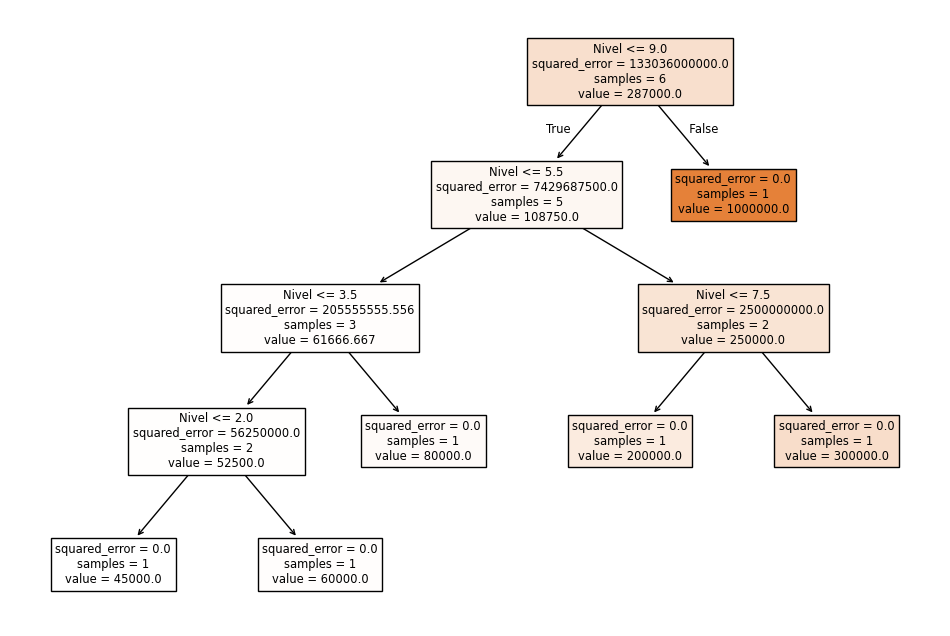

In [15]:
from sklearn.tree import plot_tree

# Graficar el primer árbol del bosque
plt.figure(figsize=(12,8))
plot_tree(regressor.estimators_[0], feature_names=["Nivel"], filled=True)
plt.show()


In [16]:
#Mostrar Hiper Paramteros
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [20]:
y_pred = regressor.predict(np.array([6.5]).reshape(1,-1))
y_pred

array([167000.])

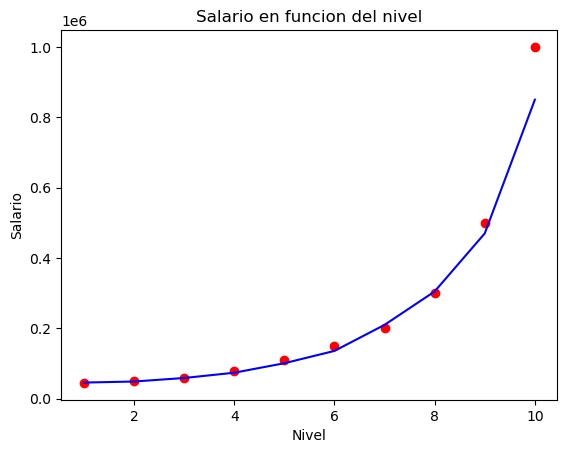

In [21]:
#Visualizar los resultados del modelo Random Forest
plt.scatter(X, y, color = "red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("Salario en funcion del nivel")
plt.xlabel("Nivel")
plt.ylabel("Salario")
plt.show()